In this project we will learn how to upload multiple files into jupyter (or colab) and work with them. For that purpose we will use **glob** library to create a list of ".ipynb" files found in a certain directory, import them as text and view.

In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
os.chdir("/Users/sheraji/OnlineCourses/PythonforScience/MasterPython_CodeAndData/indexYourCode")
os.getcwd()

'/Users/sheraji/OnlineCourses/PythonforScience/MasterPython_CodeAndData/indexYourCode'

In [2]:
# Get a list of available files
pyfiles = glob.glob("*ipynb")
pyfiles

['test_indexSlice.ipynb',
 'test_functions.ipynb',
 'MasPy_indexYourCode_solution.ipynb',
 'test_DataTypes.ipynb',
 'MasPy_indexYourCode_helper.ipynb']

In [3]:
# Select only the three files of interest
pyfiles = [pyfiles[i] for i in [0,1,3]]
pyfiles

['test_indexSlice.ipynb', 'test_functions.ipynb', 'test_DataTypes.ipynb']

In [4]:
# Import each file
allfiles = []
for fil in pyfiles:
    fid = open(fil, "r") # file identifier
#    print(fid)
    content = fid.read()
    allfiles.append(content)

In [5]:
# Same Code, shorter
allfiles = []
for fil in pyfiles:
    allfiles.append(open(fil, "r").read())
#allfiles

In [6]:
#allfiles[0]

In [7]:
allfiles = []
for fil in pyfiles:
    with open(fil, "r") as fid:
#        print(fid)
        allfiles.append(fid.read())
# allfiles[0]

## Identify Function Calls

Process the text and identify all functions: function form is word followed by paranthesis, such as bs(). then generate a list of all functions.

In [8]:
s = "My name is Mike and I like to eat chocolate"

# Find words that end with the letter "e"
re.findall(r"\w*e\b",s)  # w = words, * = any number of letters, b = closing boundary

['name', 'Mike', 'like', 'chocolate']

In [9]:
# Find words that start in capital M
re.findall(r"\bM\w*",s)

['My', 'Mike']

In [10]:
# Any word cotaining "e" anywhere
re.findall(r"\w*e",s)

['name', 'Mike', 'like', 'e', 'chocolate']

In [11]:
t = "alist = list( range(5,11))\\n"
# identify list() and range()
re.findall(r"\w*\( ?\b",t) # "?" means any number of spaces

['list( ', 'range(']

In [12]:
funwords = re.findall(r"\w*\( ?\b",allfiles[0])
funwords

['range(',
 'list(',
 'print( ',
 'print( ',
 'print( ',
 'list( ',
 'range(',
 'print( ',
 'print( ']

In [13]:
# Remove "( " from all the elements of the list
funwords = [i.strip("( ") for i in funwords]
# Remove all empty items ""
funwords = [i for i in funwords if len(i) > 0]
funwords

['range', 'list', 'print', 'print', 'print', 'list', 'range', 'print', 'print']

In [14]:
# Create a list of lists for all three files
allfuncalls = []
for f in funwords:
    allfuncalls.append([f, pyfiles[0]])
# Remove the ".ipynb" extenssion
allfuncalls

[['range', 'test_indexSlice.ipynb'],
 ['list', 'test_indexSlice.ipynb'],
 ['print', 'test_indexSlice.ipynb'],
 ['print', 'test_indexSlice.ipynb'],
 ['print', 'test_indexSlice.ipynb'],
 ['list', 'test_indexSlice.ipynb'],
 ['range', 'test_indexSlice.ipynb'],
 ['print', 'test_indexSlice.ipynb'],
 ['print', 'test_indexSlice.ipynb']]

In [15]:
# Create a list of lists for all three files and emove ".ipynb" extenssion
allfuncalls = []
for f in funwords:
    allfuncalls.append([f, pyfiles[0][:-6]])
# Remove the ".ipynb" extenssion
allfuncalls

[['range', 'test_indexSlice'],
 ['list', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['list', 'test_indexSlice'],
 ['range', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice']]

In [16]:
allfuncalls = []
fi = 0
for thisfile in allfiles:
    funwords = re.findall(r"\w*\( ?\b",thisfile)
    # Remove "( " from all the elements of the list
    funwords = [i.strip("( ") for i in funwords]
    # Remove all empty items ""
    funwords = [i for i in funwords if len(i) > 0]
    for f in funwords:
        allfuncalls.append([f, pyfiles[fi][:-6]])
    # increment file counter
    fi += 1
allfuncalls

[['range', 'test_indexSlice'],
 ['list', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['list', 'test_indexSlice'],
 ['range', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['sum', 'test_functions'],
 ['list', 'test_functions'],
 ['range', 'test_functions'],
 ['print', 'test_functions'],
 ['print', 'test_functions'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['type', 'test_DataTypes'],
 ['type', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['str', 'test_DataTypes'],
 ['str', 'test_DataTypes'],
 ['str', 'test_DataTypes'],
 ['print', 'te

In [17]:
# Another shorter form ta do the same shit
allfuncalls = []
for fi, thisfile in enumerate(allfiles):
#    print(fi, thisfile)
    funwords = re.findall(r"\w*\( ?\b",thisfile)
    # Remove "( " from all the elements of the list
    funwords = [i.strip("( ") for i in funwords]
    # Remove all empty items ""
    funwords = [i for i in funwords if len(i) > 0]
    for f in funwords:
#        print(f)
        allfuncalls.append([f, pyfiles[fi][:-6]]) # Print function and name of the file it is found in
allfuncalls

[['range', 'test_indexSlice'],
 ['list', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['list', 'test_indexSlice'],
 ['range', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['print', 'test_indexSlice'],
 ['sum', 'test_functions'],
 ['list', 'test_functions'],
 ['range', 'test_functions'],
 ['print', 'test_functions'],
 ['print', 'test_functions'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['type', 'test_DataTypes'],
 ['type', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['print', 'test_DataTypes'],
 ['str', 'test_DataTypes'],
 ['str', 'test_DataTypes'],
 ['str', 'test_DataTypes'],
 ['print', 'te

## Create an Alphabetized Index

In [18]:
# Extract all functional calls and extract the unique elements
funs = []
for i in allfuncalls:
    funs.append(i[0])
list(set(funs))

['float',
 'int',
 'str',
 'sum',
 'type',
 'bool',
 'print',
 'range',
 'set',
 'count',
 'list']

In [19]:
# Another way
uniquenames = []

for i in allfuncalls:
    if i[0] not in uniquenames:
        uniquenames.append(i[0])
uniquenames

['range',
 'list',
 'print',
 'sum',
 'type',
 'str',
 'float',
 'int',
 'set',
 'count',
 'bool']

In [20]:
# Create a dictionary
indexdict = {}

for i in allfuncalls:
    
    # Create a new key if it doesnt already exist
    if i[0] not in indexdict:
        indexdict[i[0]] = []
indexdict

{'range': [],
 'list': [],
 'print': [],
 'sum': [],
 'type': [],
 'str': [],
 'float': [],
 'int': [],
 'set': [],
 'count': [],
 'bool': []}

In [21]:
# Create a dictionary
indexdict = {}

for i in allfuncalls:
    
    # Create a new key if it doesnt already exist
    if i[0] not in indexdict:
        indexdict[i[0]] = []
    
    # Add the filenames to the list
    if i[1] not in indexdict[i[0]]:
        indexdict[i[0]].append(i[1])
indexdict

{'range': ['test_indexSlice', 'test_functions'],
 'list': ['test_indexSlice', 'test_functions', 'test_DataTypes'],
 'print': ['test_indexSlice', 'test_functions', 'test_DataTypes'],
 'sum': ['test_functions'],
 'type': ['test_DataTypes'],
 'str': ['test_DataTypes'],
 'float': ['test_DataTypes'],
 'int': ['test_DataTypes'],
 'set': ['test_DataTypes'],
 'count': ['test_DataTypes'],
 'bool': ['test_DataTypes']}

In [22]:
# Make all file names lowercase
indexdict = {}

for i in allfuncalls:
    
    # Create a new key if it doesnt already exist
    if i[0] not in indexdict:
        indexdict[i[0]] = []
    
    # Add the filenames to the list
    if i[1].lower() not in indexdict[i[0]]:
        indexdict[i[0]].append(i[1].lower())
indexdict

{'range': ['test_indexslice', 'test_functions'],
 'list': ['test_indexslice', 'test_functions', 'test_datatypes'],
 'print': ['test_indexslice', 'test_functions', 'test_datatypes'],
 'sum': ['test_functions'],
 'type': ['test_datatypes'],
 'str': ['test_datatypes'],
 'float': ['test_datatypes'],
 'int': ['test_datatypes'],
 'set': ['test_datatypes'],
 'count': ['test_datatypes'],
 'bool': ['test_datatypes']}

In [23]:
# Yet another way
indexdict = {}

for temp_funcall, temp_filename in allfuncalls:
    
    # Create a new key if it doesnt already exist
    if temp_funcall not in indexdict:
        indexdict[temp_funcall] = []
    
    # Add the filenames to the list
    if temp_filename.lower() not in indexdict[temp_funcall]:
        indexdict[temp_funcall].append(temp_filename.lower())
indexdict

{'range': ['test_indexslice', 'test_functions'],
 'list': ['test_indexslice', 'test_functions', 'test_datatypes'],
 'print': ['test_indexslice', 'test_functions', 'test_datatypes'],
 'sum': ['test_functions'],
 'type': ['test_datatypes'],
 'str': ['test_datatypes'],
 'float': ['test_datatypes'],
 'int': ['test_datatypes'],
 'set': ['test_datatypes'],
 'count': ['test_datatypes'],
 'bool': ['test_datatypes']}

In [24]:
# Yet another way
indexdict = {}

for temp_funcall, temp_filename in allfuncalls:
    
    # Force lowercase filename
    temp_filename = temp_filename.lower()
    
    # Create a new key if it doesnt already exist
    if temp_funcall not in indexdict:
        indexdict[temp_funcall] = []
    
    # Add the filenames to the list
    if temp_filename not in indexdict[temp_funcall]:
        indexdict[temp_funcall].append(temp_filename)
indexdict

{'range': ['test_indexslice', 'test_functions'],
 'list': ['test_indexslice', 'test_functions', 'test_datatypes'],
 'print': ['test_indexslice', 'test_functions', 'test_datatypes'],
 'sum': ['test_functions'],
 'type': ['test_datatypes'],
 'str': ['test_datatypes'],
 'float': ['test_datatypes'],
 'int': ['test_datatypes'],
 'set': ['test_datatypes'],
 'count': ['test_datatypes'],
 'bool': ['test_datatypes']}

In [25]:
# Write the dictionary to a text file
fid = open("function_index.txt", "w")

for key in indexdict:
    
    # the first column
    fid.write(f"{key};")
    
    # files in the second cell
    tmps = str(indexdict[key]).replace('[', '').replace(']', '').replace("'", '')
    fid.write(f"{tmps}")
    
    # new line
    fid.write("\n")
    
fid.close()

In [26]:
sorted(indexdict)

['bool',
 'count',
 'float',
 'int',
 'list',
 'print',
 'range',
 'set',
 'str',
 'sum',
 'type']

In [27]:
# Write the dictionary to a text file in alphabetical order
fid = open("function_index.txt", "w")

for key in sorted(indexdict):
    
    # the first column
    fid.write(f"{key};")
    
    # files in the second cell
    tmps = str(indexdict[key]).replace('[', '').replace(']', '').replace("'", '')
    fid.write(f"{tmps}")
    
    # new line
    fid.write("\n")
    
fid.close()

## Create a File-Function List

In this section we will create a dictionary with keys as data file names and the values will be the functions themselves.

In [28]:
# Yet another way
indexdict = {}

for temp_funcall, temp_filename in allfuncalls:
    temp_filename = temp_filename.lower()

    # Create a new key if it doesnt already exist

    if temp_filename not in indexdict:
        indexdict[temp_filename] = []
    
    # Add the functions to the list
    if temp_funcall not in indexdict[temp_filename]:
        indexdict[temp_filename].append(temp_funcall)
indexdict

{'test_indexslice': ['range', 'list', 'print'],
 'test_functions': ['sum', 'list', 'range', 'print'],
 'test_datatypes': ['print',
  'type',
  'str',
  'float',
  'int',
  'set',
  'count',
  'list',
  'bool']}

In [29]:
str(sorted(indexdict["test_datatypes"]))

"['bool', 'count', 'float', 'int', 'list', 'print', 'set', 'str', 'type']"

In [30]:
# Write the dictionary to a text file in alphabetical order
fid = open("file_index.txt", "w")

for key in sorted(indexdict):
    
    # the first column
    fid.write(f"{key};")
    
    # files in the second cell
    tmps = str(sorted(indexdict[key]))
    tmps = tmps.replace('[', '').replace(']', '').replace("'", '')
    fid.write(f"{tmps}")
    
    # new line
    fid.write("\n") 
    
fid.close()

## Which File Has the Most Points

Which of the three files we worked with has the most points? Files are in unicode, so all letters and numbers have their own unicode value. Each character can be related to a code point. We will count the code points and calculate the total number of points per file, and then take the average.

In [31]:
# The function is called ord
ord("a")

97

In [32]:
total = [0]*len(allfiles)
# Loop through all the files
for fidx, fil in enumerate(allfiles):
    # Loop through all characters and get the score
    for c in fil:
        # Sum all character scores
        total[fidx] += ord(c)
    # Normalize to character length
    total
print(total)

[335175, 246942, 1156531]


In [33]:
for i in range(len(allfiles)):
    print(f"{pyfiles[i][:-6]} has {total[i]} points")

test_indexSlice has 335175 points
test_functions has 246942 points
test_DataTypes has 1156531 points


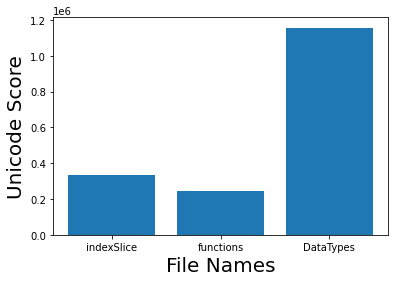

In [34]:
plt.bar(range(len(total)), total)
# Fix the x-labels
xlabels = [i[5:-6] for i in pyfiles]
plt.ylabel("Unicode Score", fontsize = 20)
plt.xlabel("File Names", fontsize = 20)
plt.xticks(range(len(total)), labels = xlabels)
plt.show()

In [35]:
# Normalize with the length of file
total = [0]*len(allfiles)
# Loop through all the files
for fidx, fil in enumerate(allfiles):
    # Loop through all characters and get the score
    for c in fil:
        # Sum all character scores
        total[fidx] += ord(c)
    # Normalize to character length
    total[fidx] = total[fidx]/len(fil)
print(total)

[70.93650793650794, 70.6557939914163, 70.3058358662614]


In [36]:
for i in range(len(allfiles)):
    print(f"{pyfiles[i][:-6]} has {total[i]:.3f} points")

test_indexSlice has 70.937 points
test_functions has 70.656 points
test_DataTypes has 70.306 points


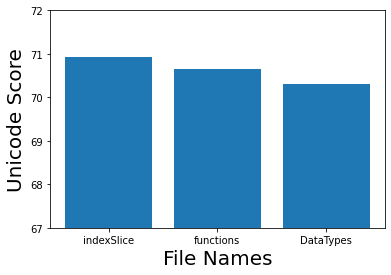

In [37]:
plt.bar(range(len(total)), total)
# Fix the x-labels
xlabels = [i[5:-6] for i in pyfiles]
plt.ylabel("Unicode Score", fontsize = 20)
plt.xlabel("File Names", fontsize = 20)
plt.xticks(range(len(total)), labels = xlabels)
plt.ylim([67,72])
plt.show()

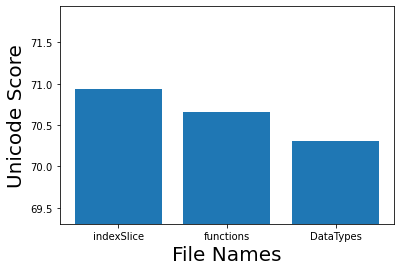

In [38]:
plt.bar(range(len(total)), total)
# Fix the x-labels
xlabels = [i[5:-6] for i in pyfiles]
plt.ylabel("Unicode Score", fontsize = 20)
plt.xlabel("File Names", fontsize = 20)
plt.xticks(range(len(total)), labels = xlabels)
plt.ylim([min(total)-1, max(total) +1])
plt.show()